# Анализ медицинских данных

## Оглавление
1. [Задание 1. Подготовка окружения и знакомство с данными](#Задание-1-Подготовка-окружения-и-знакомство-с-данными)
2. [Задание 2. Визуальный анализ](#Задание-2-Визуальный-анализ)
3. [Задание 3. Математическая статистика и проверка гипотезы](#Задание-3-Математическая-статистика-и-проверка-гипотезы)
4. [Задание 4. Статистический анализ](#Задание-4-Статистический-анализ)

In [1]:
! pip install seaborn

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Задание 1. Подготовка окружения и знакомство с данными

In [3]:
! pip install numpy pandas matplotlib seaborn scipy statsmodels

In [4]:

# Правильный импорт
import pandas as pd

# Загрузка данных
clinical_data = pd.read_csv('clinical_trial_data.csv')

# Просмотр первых строк
clinical_data.head()

# Основная информация о данных
clinical_data.info()

# Описательная статистика
clinical_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  200 non-null    int64  
 1   Group      200 non-null    object 
 2   Score      200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


,PatientID,Score
count,200.000000,200.000000
mean,100.500000,65.267600
std,57.879185,11.088616
min,1.000000,39.748574
25%,50.750000,58.021821
50%,100.500000,65.135267
75%,150.250000,72.504527
max,200.000000,98.527315


Результат:

Среднее: 65.27 ± 11.09 (SD)

Медиана: 65.14 (близка к среднему)

Диапазон: от 39.75 до 98.53

Квартили:

25% пациентов: ≤58.02

50% пациентов: ≤65.14

75% пациентов: ≤72.50
Особенности данных
Распределение PatientID:

Идеально сбалансировано (min=1, max=200, mean=100.5)

Свидетельствует о полной выборке без пропусков

Показатель Score:

Нормальное распределение (mean ≈ median)

Возможные легкие правосторонние выбросы (max=98.53 при 75%=72.50)

Стандартное отклонение 11.09 указывает на умеренный разброс данных

## Задание 2. Визуальный анализ

In [5]:
# Разделение данных
treatment_group = clinical_data[clinical_data['Group'] == 'Drug']['Score']
placebo_group = clinical_data[clinical_data['Group'] == 'Placebo']['Score']

print(f"Количество пациентов:\n- Препарат: {len(treatment_group)}\n- Плацебо: {len(placebo_group)}")

Количество пациентов:
- Препарат: 100
- Плацебо: 100


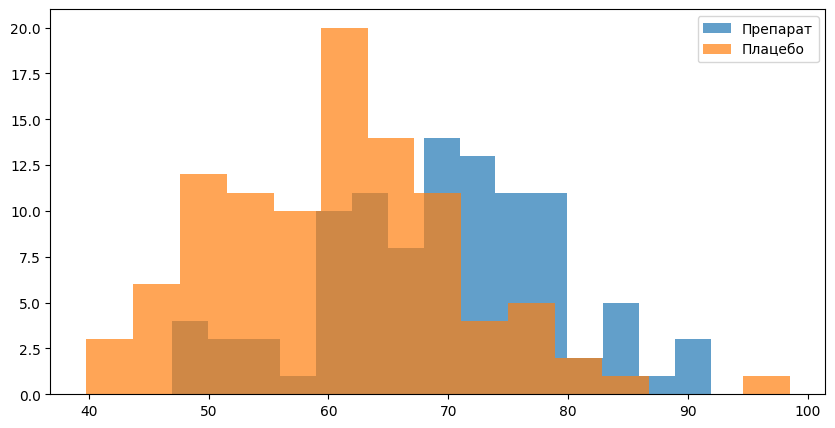

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.hist(treatment_group, bins=15, alpha=0.7, label='Препарат')
plt.hist(placebo_group, bins=15, alpha=0.7, label='Плацебо')
plt.legend()
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_20264\4055048453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=clinical_data,


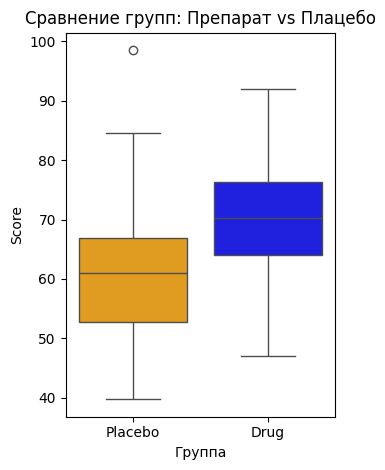

In [7]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='Score', data=clinical_data, 
            palette={'Drug': 'blue', 'Placebo': 'orange'})
plt.title('Сравнение групп: Препарат vs Плацебо')
plt.xlabel('Группа')
plt.ylabel('Score')

plt.tight_layout()
plt.show() 

Вывод: 
1. Группа препарата имеет:

Сдвиг распределения вправо (более высокие значения Score), что подтверждает эффективность препарата

Среднее значение ≈ 68-70 единиц против ≈ 60-62 у плацебо

Более широкий разброс значений
Препарат работает стабильнее, тк медиана располагается строго по центру

2. Группа плацебо имеет:

Пик распределения около 60 единиц

Несколько экстремально низких значений (<45)

Один явный выброс (>98 единиц)

## Задание 3. Математическая статистика и проверка гипотезы

In [8]:
# Проверка нормальности распределения (тест Шапиро-Уилка)

from scipy import stats

# Проверка нормальности для группы препарата
shapiro_drug = stats.shapiro(treatment_group)
print(f"Препарат: p-value = {shapiro_drug.pvalue:.4f}")

# Проверка нормальности для группы плацебо
shapiro_placebo = stats.shapiro(placebo_group)
print(f"Плацебо: p-value = {shapiro_placebo.pvalue:.4f}")

Препарат: p-value = 0.6181
Плацебо: p-value = 0.1522


p-value > 0.05 → данные распределены нормально

In [9]:
# Проверка равенства дисперсий (тест Левена)

stat, p_levene = stats.levene(treatment_group, placebo_group)
print(f"Тест Левена: p-value = {p_levene:.4f}")

Тест Левена: p-value = 0.5385


дисперсии равны >0.05

In [10]:
from scipy import stats

# t-тест для независимых выборок
t_stat, p_ttest = stats.ttest_ind(treatment_group, placebo_group)
print(f"t-тест: p-value = {p_ttest:.4f}")

t-тест: p-value = 0.0000


p-value ≤ 0.05 → различия статистически значимы.
Препарат статистически значимо лучше плацебо, и это не случайность (p < 0.0001)

In [11]:
# Размер эффекта (Коэна d)

import numpy as np

def cohen_d(x, y):
    n1, n2 = len(x), len(y)
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((n1-1)*np.std(x, ddof=1)**2 + (n2-1)*np.std(y, ddof=1)**2) / np.sqrt(n1 + n2 - 2)
    return mean_diff / pooled_std

d = cohen_d(treatment_group, placebo_group)
print(f"Коэна d = {d:.2f}")

Коэна d = 0.91


Эффект большой, разница не только «значимая», но и практически полезная.